# Photometry + Spectra

In this notebook I will examine the relationship between our photometric study of the SMC Wing and a corresponding spectroscopic study (Ramachandran et. al) with a similar stellar sample.

## Import modules

In [1]:
# Standard
import numpy as np
import matplotlib.pyplot as plt

# Auxillary
import smc

## Foreground-corrected photometry

In [2]:
# Original files
data = np.genfromtxt('../data/foreground_corrected_photometry')

id_number, ra, dec, nuv_v, nuv, b_v, v = data[:,0], data[:,1], data[:,2], \
data[:,3], data[:,4], data[:,5], data[:,6]

print("There are {} field stars in our sample".format(len(nuv)))

There are 1073 field stars in our sample


## Defining variables from photometric + spectroscopic stellar match

In [3]:
# Original files
stellar_parameters = np.genfromtxt('../data/foreground_corrected_photometry_and_stellar_parameters', \
                                   dtype = None, names = True)

# Right ascension and declination
ra_spectra = stellar_parameters['ra_1']
dec_spectra = stellar_parameters['dec_1']

# Corrections for absolute magnitude, extinction, and catalog discrepancy
# Photometric values from Fulmer et. al., matched with spectra from Ramachandran et. al.
nuv_v_matched = stellar_parameters['nuv_v']
nuv_matched = stellar_parameters['nuv']

# Stellar physical parameters
spectraltype, Tstar, logL, loggstar, logM, EB_V, MV, Rstar, vinf, vsini, vrad, Mstar, logQ0, Lmec = \
stellar_parameters['SpectralType'], stellar_parameters['T∗'], stellar_parameters['logL'], stellar_parameters['logg'], \
stellar_parameters['logM'], stellar_parameters['EB−V'], stellar_parameters['MV'], \
stellar_parameters['R∗'], stellar_parameters['vinf'], stellar_parameters['vsini'], \
stellar_parameters['vrad'], stellar_parameters['M∗'], stellar_parameters['logQ0'], \
stellar_parameters['Lmec']

/Users/leahfulmer/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


## Defining variables, organized by spectral type

In [4]:
# Organize data by spectral type
indices_B , indices_Be, indices_O, indices_Of = [], [], [], []

for i in range(len(spectraltype)):
    if (spectraltype[i][0:1] == b'B') and (b'e' not in spectraltype[i]):
        indices_B.append(i)
    elif (spectraltype[i][0:1] == b'B') and (b'e' in spectraltype[i]):
        indices_Be.append(i)
    elif (spectraltype[i][0:1] == b'O') and (b'f' not in spectraltype[i]):
        indices_O.append(i)
    elif (spectraltype[i][0:1] == b'O') and (b'f' in spectraltype[i]):
        indices_Of.append(i)
        
B = smc.organize_spectypes(indices_B, ra_spectra, dec_spectra, nuv_v_matched, nuv_matched, Tstar, logL)
Be = smc.organize_spectypes(indices_Be, ra_spectra, dec_spectra, nuv_v_matched, nuv_matched, Tstar, logL)
O = smc.organize_spectypes(indices_O, ra_spectra, dec_spectra, nuv_v_matched, nuv_matched, Tstar, logL)
Of = smc.organize_spectypes(indices_Of, ra_spectra, dec_spectra, nuv_v_matched, nuv_matched, Tstar, logL)

## Plot color-magnitude and Hertzsprung-Russell diagrams for OB stars in the SMC Wing

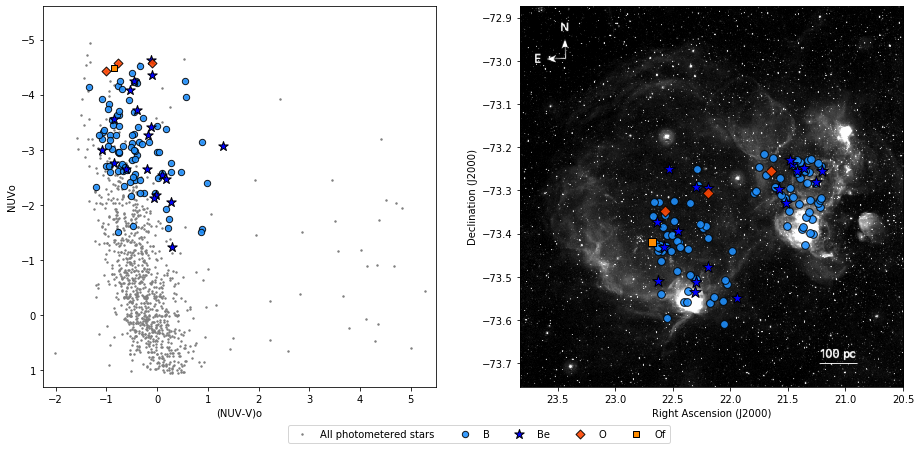

In [5]:
plt.figure(figsize=(15.5,7))
a,b = 1,2

# Plot parameters
ses = [40, 100, 40, 40]
alphas = [0.88, 1.0, 0.9, 1.0]
edge_color = 'black'
types = [B, Be, O, Of]
colors = ['dodgerblue', 'b', 'orangered', 'darkorange']
markers = ['o', '*', 'D', 's']
labels = ['B', 'Be', 'O', 'Of']

# Plot color-magnitude diagram for OB Stars in the SMC Wing
plt.subplot(a,b,1)
smc.plot_field(nuv_v, nuv, True)
for i in range(4):
    plt.scatter(types[i].nuv_v, types[i].nuv, facecolor=colors[i], \
                edgecolor='k', label=labels[i], marker = markers[i], s = ses[i], alpha=alphas[i])
# smc.plt_nuv('NUVo vs. (NUV-V)o', False)
smc.plt_nuv('', False)

# Plot spatial plot for OB Stars in the SMC Wing
plt.subplot(a,b,2)

im = plt.imread('images/smc_sgs1.png')
w,x,y,z = 23.83,20.5,-73.755,-72.874

plt.imshow(im, extent=[w,x,y,z], aspect=3.75)

for i in range(4):
    plt.scatter(types[i].ra, types[i].dec, facecolor=colors[i], \
                edgecolor='k', marker = markers[i], s = 1.5 * ses[i], alpha=alphas[i])
# plt.title('MCELS H$\alpha$ Image with Spectroscopic Stellar Population')
plt.xlabel('Right Ascension (J2000)')
plt.ylabel('Declination (J2000)')

plt.figlegend(bbox_to_anchor=(0.6, 0.05), loc=1, borderaxespad=0., prop={'size':10}, ncol = 5)

plt.show()

## Visualize radial velocities

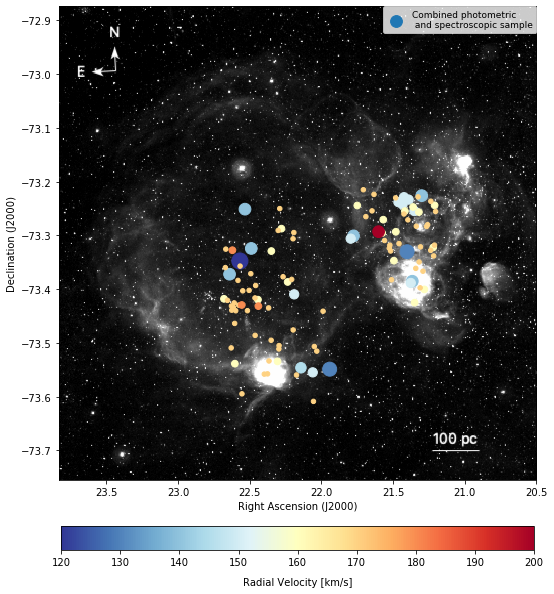

In [52]:
plt.figure(figsize=(10,10))

im = plt.imread('images/smc_sgs1.png')
w,x,y,z = 23.83,20.5,-73.755,-72.874
order = np.argsort(vrad)

plt.imshow(im, extent=[w,x,y,z], aspect=3.75)
plt.scatter(ra_spectra[order], dec_spectra[order], c=vrad[order], \
            label="Combined photometric \n and spectroscopic sample", \
           s=np.abs(vrad[order] - np.median(vrad))**1.4 + 20, marker="o", cmap="RdYlBu_r")

# smc.plt_spatial(r'MCELS H$\alpha$ Image with Photometered Stellar Population', True)
smc.plt_spatial('', True)
plt.xlim(w,x)
plt.ylim(y,z)

clb = plt.colorbar(fraction=0.0435, pad=0.085, orientation='horizontal')
clb.set_label('Radial Velocity [km/s]', labelpad = 10, y=0.485, rotation=0)

plt.show()